# 함수

## get_outlier: 이상치 인덱스 반환

In [1]:
import numpy as np

def get_outlier(df, label, feature):
    # 결로발생인 feature 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    cond = df[df[label]==1][feature]
    q_25 = np.percentile(cond.values, 25)
    q_75 = np.percentile(cond.values, 75)
    
    # IQR, 최대값과 최소값 지점 구함
    iqr = q_75 - q_25
    lowest = q_25 - 1.5*iqr
    highest = q_75 + 1.5*iqr
    
    # 아웃라이어에 대한 DataFrame index 반환
    outlier_index = cond[(cond < lowest) | (cond > highest)].index
    
    return outlier_index

## get_preprocessed_df: 이상치 제거한 새 데이터프레임 반환

In [2]:
def get_preprocessed_df(df, label, feature):
    df_copy = df.copy()

    outlier_index = get_outlier(df_copy, label, feature)

    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    return df_copy

# 데이터 로드

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
plant = pd.read_csv('data/31.finaldata_plant/plant_weather_sea.csv')
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349317 entries, 0 to 349316
Data columns (total 40 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MEA_DDHR       349317 non-null  object 
 1   PLANT          349317 non-null  int64  
 2   LOC            349317 non-null  int64  
 3   TEM_IN         349317 non-null  float64
 4   HUM_IN         349317 non-null  float64
 5   TEM_COIL       349317 non-null  float64
 6   TEM_OUT_LOC1   349317 non-null  float64
 7   HUM_OUT_LOC1   349317 non-null  float64
 8   X24H_TMA       349317 non-null  object 
 9   X24H_COND_LOC  349317 non-null  float64
 10  X48H_TMA       349317 non-null  object 
 11  X48H_COND_LOC  349317 non-null  float64
 12  DEW_POINT_IN   349317 non-null  float64
 13  MONTH          349317 non-null  int64  
 14  WEEK           349317 non-null  int64  
 15  HOUR           349317 non-null  int64  
 16  AVG_PA         349317 non-null  float64
 17  AVG_PS         349317 non-nul

# 이상치 제거

## 레이블과 상관관계 높은 변수 찾기

In [22]:
plt.figure(figsize=(20,15))

corr = plant.corr()
corr_select = corr.iloc[:,7:9]
# sns.heatmap(corr_select, cmap="RdBu", annot=True)
corr_select.sort_values(by='X24H_COND_LOC')[:5]

,X24H_COND_LOC,X48H_COND_LOC
LB_WD,-0.062606,-0.022037
TEM_COIL,-0.056952,-0.061465
MAX_WS_WD,-0.055715,-0.019422
LB_MAX_INS_WD,-0.052507,-0.007316
MAX_INS_WS_WD,-0.050607,-0.021480


<Figure size 1440x1080 with 0 Axes>

In [23]:
corr_select.sort_values(by='X48H_COND_LOC')[:5]

,X24H_COND_LOC,X48H_COND_LOC
TEM_COIL,-0.056952,-0.061465
TEM_IN,-0.041580,-0.054785
TEM_OUT_LOC1,-0.023079,-0.046738
BUOY_TA,-0.023058,-0.045690
LB_TA,-0.023043,-0.045243


## X24_COND_LOC
### TEM_COIL 이상치 제거

In [24]:
outlier_index = get_outlier(plant, 'X24H_COND_LOC', 'TEM_COIL')
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([  1052,   1594,   1712,   1800,   1803,   1806,   2273,   6196,
              6197,   6202,
            ...
             90025, 114437, 114443, 114449, 114461, 114485, 163583, 163601,
            163607, 163613],
           dtype='int64', length=196)


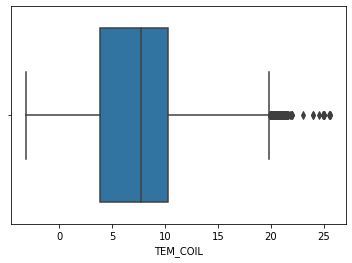

In [25]:
cond1_tem_coil = plant.loc[plant['X24H_COND_LOC']==1, 'TEM_COIL']
sns.boxplot(cond1_tem_coil)

In [26]:
print(plant.shape)
new_plant = get_preprocessed_df(plant, 'X24H_COND_LOC', 'TEM_COIL')
new_plant.shape

(349317, 40)


(349121, 40)

## X48_COND_LOC
### TEM_COIL 이상치 제거

In [27]:
outlier_index_48 = get_outlier(plant, 'X48H_COND_LOC', 'TEM_COIL')
print(outlier_index_48)

Int64Index([  1028,   1570,   1688,   1776,   1779,   1782,   2249,   6148,
              6149,   6154,
            ...
             89737, 113573, 113579, 113585, 113597, 113621, 162719, 162737,
            162743, 162749],
           dtype='int64', length=179)


In [28]:
outlier_idx_list = list(outlier_index)
outlier_idx_list.extend(list(outlier_index_48))
outlier_idx_list

[1052,
 1594,
 1712,
 1800,
 1803,
 1806,
 2273,
 6196,
 6197,
 6202,
 89622,
 89637,
 89638,
 89643,
 89644,
 89647,
 89650,
 89652,
 89655,
 89656,
 89658,
 89659,
 89661,
 89662,
 89664,
 89665,
 89667,
 89668,
 89670,
 89671,
 89673,
 89674,
 89676,
 89677,
 89679,
 89680,
 89682,
 89683,
 89685,
 89686,
 89688,
 89689,
 89691,
 89692,
 89694,
 89695,
 89697,
 89698,
 89700,
 89701,
 89703,
 89704,
 89706,
 89707,
 89709,
 89710,
 89712,
 89713,
 89715,
 89716,
 89719,
 89721,
 89722,
 89724,
 89725,
 89727,
 89728,
 89730,
 89731,
 89733,
 89734,
 89736,
 89737,
 89739,
 89740,
 89742,
 89743,
 89746,
 89748,
 89749,
 89752,
 89755,
 89757,
 89758,
 89759,
 89760,
 89761,
 89763,
 89764,
 89765,
 89767,
 89769,
 89770,
 89771,
 89772,
 89773,
 89775,
 89776,
 89777,
 89778,
 89779,
 89781,
 89782,
 89783,
 89784,
 89785,
 89787,
 89788,
 89789,
 89790,
 89791,
 89793,
 89794,
 89795,
 89796,
 89797,
 89799,
 89800,
 89801,
 89803,
 89806,
 89807,
 89809,
 89812,
 89813,
 89815,
 8

In [29]:
print(len(outlier_idx_list))
print(len(set(outlier_idx_list)))

375
352


48시간까지 제거하려면 352개를 제거해야 함. 우선 24시간만 해보기

# 데이터 저장

In [30]:
new_plant.to_csv('data/31.finaldata_plant/new_plant.csv', encoding='utf-8', index=False)